# EDA к Проекту 8

***Перечень признаков и их описание***
- bodyType — категориальный
- brand —  категориальный
- color —  категориальный
- description —  текстовый
- engineDisplacement — числовой, представленный как текст
- enginePower — числовой, представленный как текст
- fuelType — категориальный
- mileage —  числовой
- modelDate — числовой
- model_info — категориальный
- name — категориальный, желательно сократить размерность
- numberOfDoors — категориальный
- price — числовой, целевой
- productionDate — числовой
- sell_id — изображение (файл доступен по адресу, основанному на sell_id)
- vehicleConfiguration — не используется (комбинация других столбцов)
- vehicleTransmission — категориальный
- Владельцы — категориальный
- Владение — числовой, представленный как текст
- ПТС — категориальный
- Привод — категориальный
- Руль — категориальный

In [8]:
import random
import numpy as np
import pandas as pd
#import os
import sys
#import PIL
#import cv2
import re

#from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler

# keras
#import tensorflow as tf
#import tensorflow.keras.layers as L
#from tensorflow.keras.models import Model, Sequential
#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing import sequence
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#import albumentations

# plt
import matplotlib.pyplot as plt
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [9]:
print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)
#print('Tensorflow   :', tf.__version__)

Python       : 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy        : 1.19.2


In [10]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [11]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [12]:
!pip freeze > requirements.txt

# DATA

Посмотрим на типы признаков:

* bodyType - категориальный
* brand - категориальный
* color - категориальный
* description - текстовый
* engineDisplacement - числовой, представленный как текст
* enginePower - числовой, представленный как текст
* fuelType - категориальный
* mileage - числовой
* modelDate - числовой
* model_info - категориальный
* name - категориальный, желательно сократить размерность
* numberOfDoors - категориальный
* price - числовой, целевой
* productionDate - числовой
* sell_id - изображение (файл доступен по адресу, основанному на sell_id)
* vehicleConfiguration - не используется (комбинация других столбцов)
* vehicleTransmission - категориальный
* Владельцы - категориальный
* Владение - числовой, представленный как текст
* ПТС - категориальный
* Привод - категориальный
* Руль - категориальный

In [15]:
# DATA_DIR = '../input/sf-dst-car-price-prediction-part2/'
# train = pd.read_csv(DATA_DIR + 'train.csv')
# test = pd.read_csv(DATA_DIR + 'test.csv')
# sample_submission = pd.read_csv(DATA_DIR + 'sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6682 entries, 0 to 6681
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              6682 non-null   object 
 1   brand                 6682 non-null   object 
 2   color                 6682 non-null   object 
 3   description           6682 non-null   object 
 4   engineDisplacement    6682 non-null   object 
 5   enginePower           6682 non-null   object 
 6   fuelType              6682 non-null   object 
 7   mileage               6682 non-null   int64  
 8   modelDate             6682 non-null   int64  
 9   model_info            6682 non-null   object 
 10  name                  6682 non-null   object 
 11  numberOfDoors         6682 non-null   int64  
 12  price                 6682 non-null   float64
 13  productionDate        6682 non-null   int64  
 14  sell_id               6682 non-null   int64  
 15  vehicleConfiguration 

In [17]:
train.isna().sum()

bodyType                   0
brand                      0
color                      0
description                0
engineDisplacement         0
enginePower                0
fuelType                   0
mileage                    0
modelDate                  0
model_info                 0
name                       0
numberOfDoors              0
price                      0
productionDate             0
sell_id                    0
vehicleConfiguration       0
vehicleTransmission        0
Владельцы                  1
Владение                4326
ПТС                        0
Привод                     0
Руль                       0
dtype: int64

In [18]:
train.nunique()

bodyType                  17
brand                      3
color                     16
description             6147
engineDisplacement        48
enginePower              146
fuelType                   4
mileage                 2900
modelDate                 41
model_info               118
name                     900
numberOfDoors              4
price                   1628
productionDate            38
sell_id                 6682
vehicleConfiguration     288
vehicleTransmission        4
Владельцы                  3
Владение                 173
ПТС                        2
Привод                     3
Руль                       2
dtype: int64

In [19]:
pd.set_option('display.max_columns', None)
print('Размерность тренировочного датасета: ', train.shape)
display(train.head(2))
print('Размерность тестового датасета: ', test.shape)
display(test.head(2))
print('Размерность датасета c примером сабмишена: ', sample_submission.shape)
display(sample_submission.head(2))

Размерность тренировочного датасета:  (6682, 22)


,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,name,numberOfDoors,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,Владельцы,Владение,ПТС,Привод,Руль
0,седан,BMW,чёрный,Авто на бодром ходу. Все работает отлично. П...,3.0 LTR,272 N12,бензин,245000,2007,5ER,530xi 3.0 AT (272 л.с.) 4WD,4,599000.0,2007,1099980990,SEDAN AUTOMATIC 3.0,автоматическая,3 или более,NaN,Оригинал,полный,Левый
1,седан,AUDI,серебристый,"Продажа от собственника, второй владелец, ПТС ...",2.8 LTR,204 N12,бензин,183000,2011,A6,2.8 CVT (204 л.с.),4,850000.0,2011,1095836906,SEDAN VARIATOR 2.8,вариатор,2 владельца,8 лет и 6 месяцев,Оригинал,передний,Левый


Размерность тестового датасета:  (1671, 21)


,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,name,numberOfDoors,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,Владельцы,Владение,ПТС,Привод,Руль
0,универсал 5 дв.,MERCEDES,чёрный,Всем привет!\n\nПродам эксклюзивный проект 124...,3.0 LTR,220 N12,бензин,350000,1984,W124,300 3.0 AT (220 л.с.),5,1991,1099427284,WAGON_5_DOORS AUTOMATIC 3.0,автоматическая,3 или более,6 лет и 3 месяца,Оригинал,задний,Левый
1,купе,BMW,белый,Продаю любимейшую тачилу.. Обвес и тюнинг Hamm...,3.0 LTR,313 N12,дизель,15000,2011,6ER,640d xDrive 3.0d AT (313 л.с.) 4WD,2,2013,1096405886,COUPE AUTOMATIC 3.0,автоматическая,1 владелец,6 лет и 6 месяцев,Оригинал,полный,Левый


Размерность датасета c примером сабмишена:  (1671, 2)


,sell_id,price
0,1099427284,0
1,1096405886,0


**train**        
22 признака
6682 записи
Тип int у 5 признаков: mileage, modelDate, numberOfDoors, productionDate, sell_id;           
тип float у целевой переменной: price;            
тип object у остальных 16 признаков.       
        
Признаки 'Руль' и 'ПТС' имеют 2 уникальных значения;               
'brand', 'Владельцы', 'Привод' - 3 уникальных значения;    
'fuelType', 'numberOfDoors', 'vehicleTransmission' - 4 уникальных значения.           
           
Много пропущенных значений у признака 'Владение' (4326 записей).                  
1 пропущенное значение у признака 'Владельцы'.             
                 
В test есть все признаки, кроме целевого 'price'.                
Признак 'Владение' в test имеет 1092 пропущенных значения.                 
                 

# Model 1: Создадим "наивную" модель 
Эта модель будет предсказывать среднюю цену по модели и году выпуска. 
C ней будем сравнивать другие модели.



In [20]:
# split данных
data_train, data_test = train_test_split(
    train, test_size=0.15, shuffle=True, random_state=RANDOM_SEED)

In [21]:
# Наивная модель
predicts = []
for index, row in pd.DataFrame(data_test[['model_info', 'productionDate']]).iterrows():
    query = f"model_info == '{row[0]}' and productionDate == {row[1]}"
    predicts.append(data_train.query(query)['price'].median())

# заполним не найденные совпадения
predicts = pd.DataFrame(predicts)
predicts = predicts.fillna(predicts.median())

# округлим
predicts = (predicts // 1000) * 1000

# оцениваем точность
print(
    f"Точность наивной модели по метрике MAPE: {(mape(data_test['price'], predicts.values[:, 0]))*100:0.2f}%")

Точность наивной модели по метрике MAPE: 19.88%


# EDA

Проведем быстрый анализ данных для того, чтобы понимать, сможет ли с этими данными работать наш алгоритм.

Посмотрим, как выглядят распределения числовых признаков:

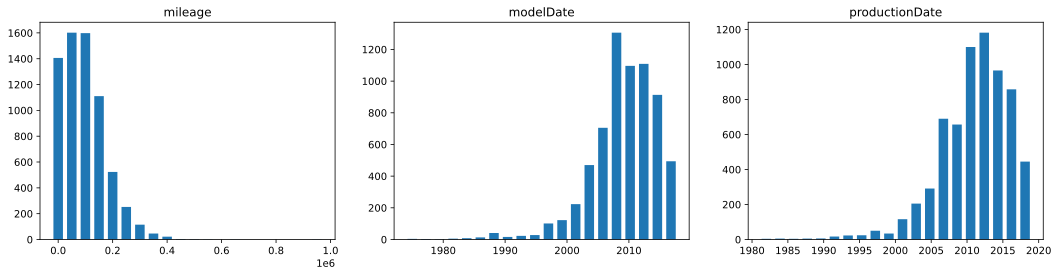

In [22]:
# посмотрим, как выглядят распределения числовых признаков
def visualize_distributions(titles_values_dict):
    columns = min(3, len(titles_values_dict))
    rows = (len(titles_values_dict) - 1) // columns + 1
    fig = plt.figure(figsize=(columns * 6, rows * 4))
    for i, (title, values) in enumerate(titles_values_dict.items()):
        hist, bins = np.histogram(values, bins=20)
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.bar(bins[:-1], hist, width=(bins[1] - bins[0]) * 0.7)
        ax.set_title(title)
    plt.show()


visualize_distributions({
    'mileage': train['mileage'].dropna(),
    'modelDate': train['modelDate'].dropna(),
    'productionDate': train['productionDate'].dropna()
})

Объединим датасеты test и train для корректного EDA

In [23]:
train['Train'] = 1  # помечаем трейн
test['Train'] = 0  # помечаем тест

test['price'] = 0

data = train.append(test, sort=False).reset_index(drop=True)  # объединяем

In [24]:
data.sample(3)

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,name,numberOfDoors,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,Владельцы,Владение,ПТС,Привод,Руль,Train
7399,внедорожник 5 дв.,BMW,белый,Автодилер года 2020\n\nПобедитель в номинации ...,2.0 LTR,177 N12,дизель,144437,2009,X1,20d 2.0d AT (177 л.с.) 4WD,5,0.0,2011,1099879366,ALLROAD_5_DOORS AUTOMATIC 2.0,автоматическая,2 владельца,NaN,Оригинал,полный,Левый,0
4273,хэтчбек 5 дв.,BMW,чёрный,"Продаю а/м БМВ 118i, 136 л.с., 2017 года выпус...",1.5 LTR,136 N12,бензин,56094,2015,1ER,118i 1.5 AT (136 л.с.),5,1495000.0,2017,1100201582,HATCHBACK_5_DOORS AUTOMATIC 1.5,автоматическая,1 владелец,NaN,Оригинал,задний,Левый,1
3362,внедорожник 5 дв.,MERCEDES,чёрный,"Автомобиль в идеальном состоянии, все исправно...",2.0 LTR,211 N12,бензин,133000,2012,GLK_KLASSE,250 2.0 AT (211 л.с.) 4WD,5,1280000.0,2013,1099378480,ALLROAD_5_DOORS AUTOMATIC 2.0,автоматическая,2 владельца,NaN,Оригинал,полный,Левый,1


Очистим признаки, где это необходимо и выделим новые признаки

### enginePower

In [25]:
# очистим признак enginePower и приведем его к типу int64
data['enginePower'] = data['enginePower'].apply(
    lambda x: x.replace(' N12', '')).values.astype('int64')

<AxesSubplot:>

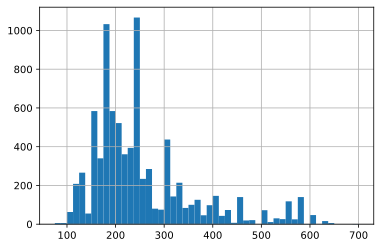

In [26]:
data.enginePower.hist(bins=50)

<AxesSubplot:>

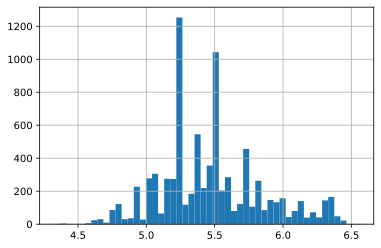

In [27]:
np.log(data.enginePower+1).hist(bins=50)

In [28]:
data.enginePower.describe()

count    8353.000000
mean      255.560038
std       108.883844
min        75.000000
25%       184.000000
50%       231.000000
75%       306.000000
max       700.000000
Name: enginePower, dtype: float64

### engineDisplacement

In [29]:
# очистим признак engineDisplacement
data['engineDisplacement'] = data['engineDisplacement'].apply(
    lambda x: x.replace(' LTR', ''))

In [30]:
data['engineDisplacement'].value_counts()

2.0          2430
3.0          2349
1.8           411
1.6           410
4.4           329
5.5           268
3.5           250
2.5           248
2.1           221
4.0           153
4.7           137
1.4           106
2.8           106
4.2           103
5.0            74
1.5            73
3.2            60
2.2            58
4.8            57
2.9            50
2.4            44
3.1            44
6.2            40
6.0            37
5.4            33
1.2            33
1.3            32
2.7            24
3.6            23
4.1            23
1.7            15
2.3            14
3.7            14
5.2            13
5.9            11
2.6             9
0.7             6
undefined       6
1.9             5
4.6             5
6.6             5
5.8             5
4.3             4
3.4             4
5.6             3
6.3             3
3.8             3
4.9             2
Name: engineDisplacement, dtype: int64

In [25]:
data[data['engineDisplacement']=='undefined']

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,name,numberOfDoors,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,Владельцы,Владение,ПТС,Привод,Руль,Train
2296,хэтчбек 5 дв.,BMW,чёрный,"Автомобиль в наличии Москве , с ПТС , производ...",undefined,184,электро,9000,2017,I3,S Electro AT (136 кВт),5,2719000.0,2019,1100083262,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,NaN,Оригинал,задний,Левый,1
3725,хэтчбек 5 дв.,BMW,чёрный,"BMW i3 Электромобиль с бензиновым генератором,...",undefined,170,электро,39500,2017,I3,Electro AT (126 кВт),5,2299711.0,2017,1098041130,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,2 года и 11 месяцев,Оригинал,задний,Левый,1
3726,хэтчбек 5 дв.,BMW,голубой,Прибыло из Америки в августе 20 года. Полная и...,undefined,170,электро,28800,2017,I3,Electro AT (126 кВт),5,2170000.0,2017,1100097316,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,NaN,Оригинал,задний,Левый,1
5862,хэтчбек 5 дв.,BMW,белый,В наличии! Автомобиль куплен в США! Комплектац...,undefined,170,электро,35810,2013,I3,Electro AT (126 кВт),5,1690000.0,2016,1100153696,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,NaN,Оригинал,задний,Левый,1
6283,хэтчбек 5 дв.,BMW,чёрный,Авто в идеальном состоянии\nЕсть REX (range ex...,undefined,170,электро,60000,2013,I3,Electro AT (126 кВт),5,1790000.0,2015,1097395090,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,NaN,Оригинал,задний,Левый,1
7687,хэтчбек 5 дв.,BMW,серебристый,.,undefined,170,электро,89942,2013,I3,Electro AT (126 кВт),5,0.0,2014,1100166318,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,NaN,Оригинал,задний,Левый,0


Все 6 автомобиней со значением признака engineDisplacement 'undefined' являются электромобилями, а значит они из премиального класса. Для того,чтобы сохранить признак engineDisplacement числовым заменим неопределенные значения на большое для данного признака значение, например, на'8.0'.            
Отметим также, что 5 из 6ти автомобилей из train, а один из test.

In [31]:
data['engineDisplacement'] = data['engineDisplacement'].apply(
    lambda x: x.replace('undefined', '8.0')).values.astype('float64')

In [32]:
data['engineDisplacement'].describe()

count    8353.000000
mean        2.783192
std         1.064862
min         0.700000
25%         2.000000
50%         2.800000
75%         3.000000
max         8.000000
Name: engineDisplacement, dtype: float64

<AxesSubplot:>

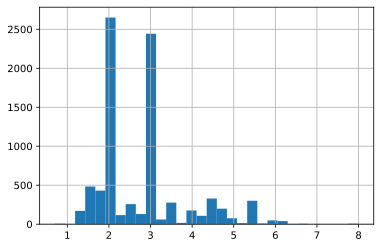

In [33]:
data['engineDisplacement'].hist(bins=30)

<AxesSubplot:>

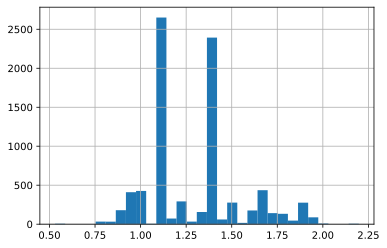

In [34]:
np.log(data['engineDisplacement']+1).hist(bins=30)

### name

In [35]:
data.name

0       530xi 3.0 AT (272 л.с.) 4WD
1                2.8 CVT (204 л.с.)
2         350 3.5 AT (306 л.с.) 4WD
3                2.0 CVT (180 л.с.)
4                1.8 CVT (160 л.с.)
                   ...             
8348         320i 2.0 AT (184 л.с.)
8349     25d 3.0d AT (218 л.с.) 4WD
8350             1.4 AMT (150 л.с.)
8351         520i 2.0 AT (184 л.с.)
8352         2.0 AMT (225 л.с.) 4WD
Name: name, Length: 8353, dtype: object

Информация об объеме двигателя содержится в engineDisplacement. Информация о мощности двигателя - в enginePower. Выделим информацию о типе коробки передач и о типе привода.      
Конфигурация модели есть не во всех строках- выделять в отдельный признак не будем.

In [36]:
# коробка передач
data['gearbox'] = data['name'].str.findall(r'\w+\s\(')  # regex для поиска
data['gearbox'] = data['gearbox'].astype('str')
data['gearbox'] = data['gearbox'].str.findall(r'\w+').str[-1]  # очистка
data['gearbox'].value_counts()

AT     6560
AMT    1201
CVT     406
MT      186
Name: gearbox, dtype: int64

In [37]:
data.groupby(['Train','gearbox']).count().brand

Train  gearbox
0      AMT         242
       AT         1299
       CVT          81
       MT           49
1      AMT         959
       AT         5261
       CVT         325
       MT          137
Name: brand, dtype: int64

In [38]:
# тип привода
data['drive4WD'] = data['name'].str.findall(r'\)\s\w+')
data['drive4WD'] = data['drive4WD'].astype('str')
data['drive4WD'] = data['drive4WD'].apply(lambda x: 1 if '4WD' in x else 0)

In [39]:
data['drive4WD'].value_counts()

1    5218
0    3135
Name: drive4WD, dtype: int64

In [40]:
data.groupby(['Train','drive4WD']).count().brand

Train  drive4WD
0      0            642
       1           1029
1      0           2493
       1           4189
Name: brand, dtype: int64

In [41]:
# всё забрали - удаляем name
data.drop('name', axis=1, inplace=True)

### vehicleConfiguration

In [42]:
data.vehicleConfiguration

0                 SEDAN AUTOMATIC 3.0
1                  SEDAN VARIATOR 2.8
2                 SEDAN AUTOMATIC 3.5
3                  SEDAN VARIATOR 2.0
4               LIFTBACK VARIATOR 1.8
                    ...              
8348              SEDAN AUTOMATIC 2.0
8349    ALLROAD_5_DOORS AUTOMATIC 3.0
8350        ALLROAD_5_DOORS ROBOT 1.4
8351              SEDAN AUTOMATIC 2.0
8352                  SEDAN ROBOT 2.0
Name: vehicleConfiguration, Length: 8353, dtype: object

Тип кузова есть в bodyType, инф. о коробке передач - в vehicleTransmission, объем двигателя - в engineDisplacement.                 
=> Удаляем

In [43]:
data.drop('vehicleConfiguration', axis=1, inplace=True)

### Владение        
Очень много пропусков - удаляем признак

In [44]:
data.drop('Владение', axis=1, inplace=True)

### bodyType

In [45]:
data.bodyType.value_counts()

седан                   3541
внедорожник 5 дв.       2896
купе                     543
хэтчбек 5 дв.            364
лифтбек                  299
универсал 5 дв.          196
минивэн                  178
купе-хардтоп             111
родстер                   88
хэтчбек 3 дв.             57
кабриолет                 54
компактвэн                 8
внедорожник 3 дв.          5
лимузин                    5
внедорожник открытый       4
пикап двойная кабина       3
седан 2 дв.                1
Name: bodyType, dtype: int64

In [46]:
N = len(data.bodyType.unique())
df = pd.DataFrame({'ind': data.bodyType.unique(),
                   'Train': np.zeros(N), 'Test': np.zeros(N)})
df.set_index('ind', inplace=True)
for i in data.bodyType.unique():
    df.loc[i, 'Train'] = train[train.bodyType == i].brand.count()
    df.loc[i, 'Test'] = test[test.bodyType == i].brand.count()
df = df[['Train', 'Test']].astype(int)
df

,Train,Test
ind,,
седан,2843,698
лифтбек,245,54
внедорожник 5 дв.,2315,581
хэтчбек 5 дв.,296,68
минивэн,146,32
универсал 5 дв.,153,43
купе-хардтоп,91,20
купе,427,116
кабриолет,44,10


In [47]:
# Объединим некоторые названия (в том числе для исключения тех названий, которых нет в test)
bodyType_dict = {'седан': 'седан',
                 'внедорожник 5 дв.': 'внедорожник',
                 'купе': 'купе',
                 'хэтчбек 5 дв.': 'хэтчбек',
                 'лифтбек': 'лифтбек',
                 'универсал 5 дв.': 'универсал',
                 'минивэн': 'минивэн',
                 'купе-хардтоп': 'купе',
                 'родстер': 'родстер',
                 'хэтчбек 3 дв.': 'хэтчбек',
                 'кабриолет': 'кабриолет',
                 'компактвэн': 'минивэн',
                 'внедорожник 3 дв.': 'внедорожник',
                 'лимузин': 'седан',
                 'внедорожник открытый': 'внедорожник',
                 'пикап двойная кабина': 'пикап',
                 'седан 2 дв.': 'седан'
                 }
data['bodyType'] = data['bodyType'].map(bodyType_dict)

In [48]:
data.bodyType.value_counts()

седан          3547
внедорожник    2905
купе            654
хэтчбек         421
лифтбек         299
универсал       196
минивэн         186
родстер          88
кабриолет        54
пикап             3
Name: bodyType, dtype: int64

### Владельцы

In [49]:
data.Владельцы.value_counts()

3 или более    3311
1 владелец     2526
2 владельца    2515
Name: Владельцы, dtype: int64

In [50]:
data[data.Владельцы.isna()]

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,numberOfDoors,price,productionDate,sell_id,vehicleTransmission,Владельцы,ПТС,Привод,Руль,Train,gearbox,drive4WD
4994,седан,AUDI,чёрный,машина в идеале! вложено примерно 400тыс.руб \...,4.2,360,бензин,160000,1999,S8,4,600000.0,2001,1019330519,автоматическая,NaN,Оригинал,полный,Левый,1,AT,1


In [51]:
data.groupby(['Train','Владельцы']).count().brand

Train  Владельцы  
0      1 владелец      497
       2 владельца     509
       3 или более     665
1      1 владелец     2029
       2 владельца    2006
       3 или более    2646
Name: brand, dtype: int64

In [52]:
# заполним пропуск на наиболее частое значение
data.Владельцы.fillna('3 или более', inplace=True)

### Руль и ПТС

In [53]:
data.Руль.value_counts()

Левый     8351
Правый       2
Name: Руль, dtype: int64

In [54]:
data.groupby(['Train','Руль']).count().brand

Train  Руль  
0      Левый     1671
1      Левый     6680
       Правый       2
Name: brand, dtype: int64

In [55]:
# В test нет праворульных автомобилей. Можем удалить признак за неинформативностью
data.drop('Руль', axis=1, inplace=True)

In [56]:
data.ПТС.value_counts()

Оригинал    7474
Дубликат     879
Name: ПТС, dtype: int64

In [57]:
data['ПТС'] = data['ПТС'].apply(lambda x: 1 if 'Оригинал' in x else 0)

### description

In [58]:
!pip install pymorphy2[fast]
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13709 sha256=b5e7abd5a86359916987414ac807e98c010fca50871c9685e4a2024e94707c65
  Stored in directory: c:\users\nailya\appdata\local\pip\cache\wheels\72\b0\3f\1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
  Created wheel for DAWG: filename=DAWG-0.8.0-cp37-cp37m-win_amd64.whl size=151089 sha256=b1856035056f61ee0a71cdf8ba26b8ecff8e84abb3b8872ae9748f7e73ad2113
  Stored in directory: c:\users\nailya\appdata\local\pip\cache\wheels\85\51\a4\2de41ff197786537075027c27b479a38da92f50abc86634445
Successfully built docopt DAWG


In [59]:
# вставляем пробелы после запятых, чтобы не склеивались слова
data['description'] = data['description'].apply(lambda x: x.replace(',', ', '))
data['description'] = data['description'].apply(lambda x: x.replace('  ', ' '))

In [67]:
import string
from nltk import word_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

print(string.punctuation)

spec_chars = string.punctuation + '«»—…’‘”“©'
print(spec_chars)

# Зададим функцию для удаления спец символов


def remove_chars(text, chars):
    return "".join([ch for ch in text if ch not in chars])

# Функция для обработки текста


def text_tokenizer(text):

    text = text.lower()

    # Удалим все спец символы
    text = remove_chars(text, spec_chars)

    # Удалим все цифры
    text = remove_chars(text, string.digits)

    # Удалим \n и \t в тексте
    text = text.replace('\n', ' ').replace('\t', ' ')

    # Токенизируем текст
    tokens = word_tokenize(text)

    # Удаляем стоп-слова
    filtered_token = [w for w in tokens if not w in stopwords_list]

    # лемматизируем
    for token in filtered_token:
        token = morph.normal_forms(token)[0]

    return filtered_token

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nailya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nailya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~«»—…’‘”“©


In [68]:
stopwords_list = stopwords.words("russian")
# Дополним список слов-на-выброс
list_to_drop = ['всем', 'привет', '•', '–', 'лс', 'тыс', 'также', 'всё', 'вся',
                'ваш', 'вашего', 'вообще', 'тр', 'наших', 'продаж', 'оф', 'гк',
                'каких', 'изза', '·', '●', 'тк', 'нуждаюсь', '°', 'приглашаем',
                'взноса', 'рус', 'ud', 'ac', 'ae', 'рольф', 'in', 'лизинг', 'очень',
                'просто', 'см', 'ткм', 'ог', 'пд', '✔', 'д', '☛', 'ао', 'купи',
                'сниженияперерасчета', 'банкапартнёра', '₽', 'прозрачность',
                'ещё', '✅', '➥', 'mp', 'й', 'x', 'скидки', '☑️', '″', 'л', 'р', 'х',
                'ам', 'м', '∙', 'тд', 'с', 'в', 'е', 'т', 'mp', 'й', 'деньги', 'это', 'г',
                'r', 'u', 'm', 'a', 'v', 'b', 'x', 'p', 'd', 'i', 'f', 'sa', 's', 'k', 'e',
                'id', 'течении', 'денег', 'суммы', 'сел', 'около', 'я', 'уже', 'при']

stopwords_list.extend(list_to_drop)

In [69]:
data['description2'] = data['description'].apply(lambda x: text_tokenizer(x))
data['description2'] = data['description2'].apply(lambda x: ' '.join(x))

In [66]:
# Текст закоментирован тк облако его результаты уже применены в коде далее

# # Собираем текст для построения облака слов
# text=[]
# data['description2'].apply(lambda x:text.append(x))
# text=' '.join(text)

In [60]:
#from wordcloud import WordCloud

In [61]:
# # рисуем облако слов
# wc = WordCloud(width=2600, height=2200, background_color="white", relative_scaling=1.0,
#                collocations=True, min_font_size=10).generate(text)
# #plt.axis("off")
# plt.figure(figsize=(9, 6))
# plt.imshow(wc, interpolation="bilinear")
# plt.xticks([])
# plt.yticks([])
# plt.show()

In [62]:
# # печатаем наиболее частые биграммы и слова
# wc.words_.keys()

In [70]:
data['description'] = data['description2']
data.drop('description2', axis=1, inplace=True)

In [71]:
# выделяем словосочетания, которые могут влиять на цену авто, в отдельные признаки
data['защита_картера'] = data['description'].apply(
    lambda x: 1 if ('защита' and 'картера') in x else 0)
data['мультифункциональный_руль'] = data['description'].apply(
    lambda x: 1 if ('мультифункциональный' and 'руль') in x else 0)
data['датчики_дождя_и_света'] = data['description'].apply(
    lambda x: 1 if ('датчики' and 'дождя' and 'света') in x else 0)
data['АБС'] = data['description'].apply(lambda x: 1 if (
    'антиблокировочная' and 'система') in x else 0)
data['круиз_контроль'] = data['description'].apply(
    lambda x: 1 if ('круиз' and 'контроль') in x else 0)
data['легкосплавные_диски'] = data['description'].apply(
    lambda x: 1 if ('легкосплавные' and 'диски') in x else 0)
data['камера_заднего_вида'] = data['description'].apply(
    lambda x: 1 if ('камера' and 'видеокамера') in x else 0)
data['курсовая_устойчивость'] = data['description'].apply(
    lambda x: 1 if ('система' and 'курсовой' and 'устойчивости') in x else 0)

# Генерация признаков

In [72]:
# объединим редкие модели в model_info
list_to_other = data.model_info.value_counts()[94:].index
data.model_info = data.model_info.apply(
    lambda x: 'other' if x in list_to_other else x)

In [73]:
# Закодируем некоторые категориальные признаки
# розовое авто есть только в train, его зашифруем вместе с редким жёлтым
data['color_code'] = data.apply(lambda x: 1 if x['color'] == 'белый'
                                else 2 if x['color'] == 'жёлтый' or x['color'] == 'розовый'
                                else 3 if x['color'] == 'бежевый' else 4 if x['color'] == 'золотистый'
                                else 5 if x['color'] == 'оранжевый' else 6 if x['color'] == 'зелёный'
                                else 7 if x['color'] == 'голубой' else 8 if x['color'] == 'синий'
                                else 9 if x['color'] == 'серебристый' else 10 if x['color'] == 'пурпурный'
                                else 11 if x['color'] == 'красный' else 12 if x['color'] == 'фиолетовый'
                                else 13 if x['color'] == 'коричневый' else 14 if x['color'] == 'серый'
                                else 15, axis=1)
data['Владельцы_code'] = data.apply(lambda x: 1 if x['Владельцы'] == '1 владелец' else 2 if x['Владельцы'] == '2 владельца'
                                    else 3, axis=1)

In [74]:
# булевы признаки
boolean_features = ['ПТС', 'drive4WD', 'защита_картера', 'мультифункциональный_руль',
                    'датчики_дождя_и_света', 'АБС', 'круиз_контроль',
                    'легкосплавные_диски', 'камера_заднего_вида',
                    'курсовая_устойчивость']

# категориальные признаки
categorical_features = ['color_code', 'numberOfDoors', 'Владельцы_code']
cat_features_to_code = ['bodyType', 'brand', 'fuelType', 'model_info',
                        'vehicleTransmission', 'Привод', 'gearbox', 'Владельцы', 'color']

# числовые признаки
numerical_features = ['engineDisplacement', 'enginePower', 'mileage',
                      'modelDate', 'productionDate']

In [75]:
num_list = numerical_features.copy()
for column in num_list:
    data[column+'_log'] = np.log(data[column]+1)
    numerical_features.append(column+'_log')

data['price_log'] = np.log(data['price']+1)

In [76]:
data.sample(2)

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,numberOfDoors,price,productionDate,sell_id,vehicleTransmission,Владельцы,ПТС,Привод,Train,gearbox,drive4WD,защита_картера,мультифункциональный_руль,датчики_дождя_и_света,АБС,круиз_контроль,легкосплавные_диски,камера_заднего_вида,курсовая_устойчивость,color_code,Владельцы_code,engineDisplacement_log,enginePower_log,mileage_log,modelDate_log,productionDate_log,price_log
3640,хэтчбек,MERCEDES,красный,год выпуска пробег км кузов хэтчбек дв цвет кр...,2.0,360,бензин,55000,2013,A_KLASSE_AMG,5,2000000.0,2015,1100112736,роботизированная,1 владелец,1,полный,1,AMT,1,0,1,0,0,0,0,0,0,11,3,1.098612,5.888878,10.915107,7.607878,7.608871,14.508658
6421,внедорожник,BMW,белый,идеаленбез окрасов подкрасов дтп оригинале про...,3.0,249,дизель,28000,2014,X6,5,3780000.0,2017,1100161060,автоматическая,1 владелец,1,полный,1,AT,1,0,0,0,0,0,0,0,0,1,3,1.386294,5.521461,10.239996,7.608374,7.609862,15.145235


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353 entries, 0 to 8352
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bodyType                   8353 non-null   object 
 1   brand                      8353 non-null   object 
 2   color                      8353 non-null   object 
 3   description                8353 non-null   object 
 4   engineDisplacement         8353 non-null   float64
 5   enginePower                8353 non-null   int64  
 6   fuelType                   8353 non-null   object 
 7   mileage                    8353 non-null   int64  
 8   modelDate                  8353 non-null   int64  
 9   model_info                 8353 non-null   object 
 10  numberOfDoors              8353 non-null   int64  
 11  price                      8353 non-null   float64
 12  productionDate             8353 non-null   int64  
 13  sell_id                    8353 non-null   int64

In [71]:
# Сохраняем датасет со значимыми признаками
data.to_csv('../working/data.csv', index=False)

In [72]:
# также сохраняем названия столбцов по типам
data_cols = pd.DataFrame()
data_cols['numerical_features'] = [','.join(numerical_features)]
data_cols['boolean_features'] = [','.join(boolean_features)]
data_cols['categorical_features'] = [','.join(categorical_features)]
data_cols['cat_features_to_code'] = [','.join(cat_features_to_code)]
data_cols.to_csv('../working/data_cols.csv', index=False)

## Корреляция числовых признаков

In [78]:
df_feat = data.copy()

In [79]:
import seaborn as sns

<AxesSubplot:>

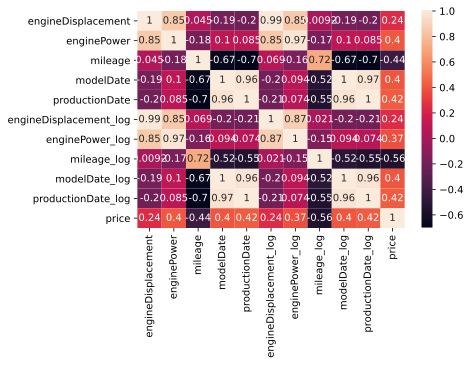

In [80]:
num_target = numerical_features.copy()
num_target.append('price')
df_num = df_feat[num_target]
sns.heatmap(df_num.corr(), annot=True)

### Значимость переменных по ANOVA F test

In [81]:
from sklearn.feature_selection import f_classif, mutual_info_classif

<AxesSubplot:title={'center':'Значимость числовых переменных'}>

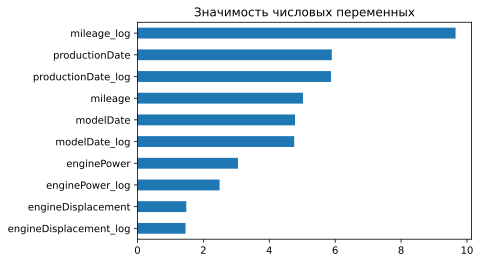

In [82]:
df = df_feat[df_feat['Train'] == 1]
imp_num = pd.Series(f_classif(df[numerical_features], df['price'])[
                    0], index=numerical_features)
imp_num.sort_values(inplace=True)
imp_num.plot(kind='barh', title='Значимость числовых переменных')

In [83]:
# Label Encoding
for column in cat_features_to_code:
    df_feat[column] = df_feat[column].astype('category').cat.codes

# One-Hot Encoding: в pandas есть готовая функция - get_dummies.
df_feat = pd.get_dummies(df_feat, columns=cat_features_to_code, dummy_na=False)

In [84]:
df = df_feat[df_feat['Train'] == 1]
new_bool_cols = df_feat.columns[29:]

<AxesSubplot:title={'center':'Значимость бинарных и категориальных признаков'}>

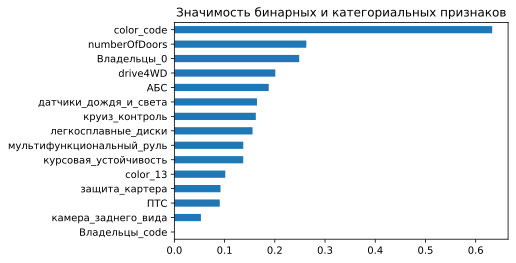

In [85]:
to_add = ['Владельцы_0', 'color_13']
imp_feat = pd.Series(mutual_info_classif(df[boolean_features + categorical_features + to_add], df['price'],
                                         discrete_features=True), index=boolean_features + categorical_features + to_add)
imp_feat.sort_values(inplace=True)
imp_feat.plot(
    kind='barh', title='Значимость бинарных и категориальных признаков')

<AxesSubplot:title={'center':'Значимость бинарных признаков, полученных из категориальных'}>

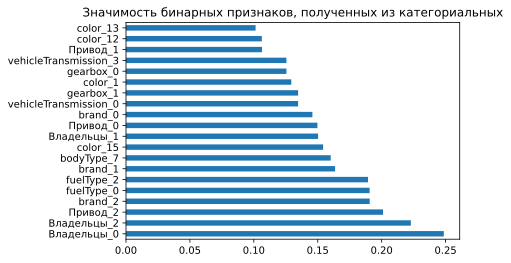

In [86]:
imp_feat1 = pd.Series(mutual_info_classif(df[new_bool_cols], df['price'],
                                          discrete_features=True), index=new_bool_cols)
imp_feat1.sort_values(ascending=False, inplace=True)
imp_feat1[:20].plot(
    kind='barh', title='Значимость бинарных признаков, полученных из категориальных')

## Статистическая значимость нечисловых признаков по тесту Стьюдента

In [87]:
from scipy.stats import ttest_ind
from itertools import combinations

In [88]:
# Проверим нулевую гипотезу о том,
# что распределения price по различным параметрам неразличимы:
def get_stat_dif(d_column, d_df):
    cols = d_df.loc[:, d_column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(d_df.loc[d_df.loc[:, d_column] == comb[0], 'price'].dropna(),
                          d_df.loc[d_df.loc[:, d_column] == comb[1], 'price'].dropna()).pvalue
        if ttest <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            return(d_column)
            break

In [89]:
diff_cols = []

df = df_feat[(df_feat['Train'] == 1)]
for col in boolean_features+categorical_features:
    diff_cols.append(get_stat_dif(col, df))
diff_cols = list(filter(None, diff_cols))

In [90]:
not_diff_cols = list(set(boolean_features+categorical_features)
                     - set(diff_cols))
print(f'по тесту Стьюдента {len(not_diff_cols)} признаков \
      из {len(boolean_features+categorical_features)} бинарных \
      и dummies признаков НЕ СОДЕРЖАТ СТАТИСТИЧЕСКИ ЗНАЧИМЫХ РАЗЛИЧИЙ \
      с таргетом')
print('вот они:= ', *sorted(not_diff_cols))

по тесту Стьюдента 1 признаков       из 13 бинарных       и dummies признаков НЕ СОДЕРЖАТ СТАТИСТИЧЕСКИ ЗНАЧИМЫХ РАЗЛИЧИЙ       с таргетом
вот они:=  Владельцы_code


In [91]:
imp_list = imp_feat1[:20].index

In [92]:
diff_cols = []

for col in imp_list:
    diff_cols.append(get_stat_dif(col, df))
diff_cols = list(filter(None, diff_cols))

In [93]:
not_diff_cols = list(set(imp_list)
                     - set(diff_cols))
print(f'по тесту Стьюдента {len(not_diff_cols)} признаков \
      из {len(imp_list)} бинарных \
      и dummies признаков НЕ СОДЕРЖАТ СТАТИСТИЧЕСКИ ЗНАЧИМЫХ РАЗЛИЧИЙ \
      с таргетом')
print('вот они:= ', *sorted(not_diff_cols))

по тесту Стьюдента 1 признаков       из 20 бинарных       и dummies признаков НЕ СОДЕРЖАТ СТАТИСТИЧЕСКИ ЗНАЧИМЫХ РАЗЛИЧИЙ       с таргетом
вот они:=  color_13
